# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)


2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [4]:
1. # Load csv file data into a pandas dataframe
import pandas as pd
!wget -O airbnb_hw.csv "https://raw.githubusercontent.com/dahalnirusma/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv"
df = pd.read_csv("airbnb_hw.csv")
df.head()

--2025-02-03 22:26:13--  https://raw.githubusercontent.com/dahalnirusma/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3414307 (3.3M) [text/plain]
Saving to: ‘airbnb_hw.csv’

airbnb_hw.csv       100%[===================>]   3.26M  --.-KB/s    in 0.08s   

2025-02-03 22:26:14 (39.1 MB/s) - ‘airbnb_hw.csv’ saved [3414307/3414307]



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [10]:
1. # Convert all strings in Price to numeric values
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
# Track total number of missing values
missing_values = df["Price"].isna().sum()
print(f"Missing values: {missing_values}")

Missing values: 181


The price column has no symbols so the next changes that should be made are converting the datatype of the values to numeric, (this is necessary when using the values from the column to perform arithmetic operations). This also converts all missing values into NaN. The total missing values is 181.

In [26]:
2. #Load csv file into pandas dataframe
!wget -O mn_police_use_of_force.csv "https://raw.githubusercontent.com/dahalnirusma/wrangling/refs/heads/main/assignment/data/mn_police_use_of_force.csv"
police_df = pd.read_csv("mn_police_use_of_force.csv")
police_df.head()

--2025-02-04 05:04:00--  https://raw.githubusercontent.com/dahalnirusma/wrangling/refs/heads/main/assignment/data/mn_police_use_of_force.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1873502 (1.8M) [text/plain]
Saving to: ‘mn_police_use_of_force.csv’

mn_police_use_of_fo 100%[===================>]   1.79M  7.00MB/s    in 0.3s    

2025-02-04 05:04:01 (7.00 MB/s) - ‘mn_police_use_of_force.csv’ saved [1873502/1873502]



,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [13]:
# Check unique values and missing data
print(police_df['subject_injury'].value_counts(dropna=False))
print(police_df["subject_injury"].dtype)

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
object


In [16]:
# Get missing values
missing_police_values = police_df["subject_injury"].isna().sum()
total_values = len(police_df)
missing_values_proportions = missing_values / total_values
print(f"Missing values: {missing_police_values}")
print(f"Proportion missing: {missing_values_proportions:.2%}")

# Cross-Tabulate
cross_tab = pd.crosstab(police_df["subject_injury"], police_df["force_type"], margins=True)
print(cross_tab)

Missing values: 9848
Proportion missing: 1.40%
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
All                 2          2379                172        2   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40                       2   
All                            77                 74                       3   

force_type      Police K9 Bite  Taser   All  
subject_injury                               
No                           2    150  1446  
Yes                         44    172  1631  
All                         46  

2. 76.2% of the data is missing which is a huge concern as that means a significant part of the data has inconsistencies. A majority of the data missing means any conclusions derived from the data is skewed and biased. The tabulation reveals that missing values are not random as higher-force cases have a higher report rate versus low-force cases that have lower concentrations of reported injuries.

In [21]:
3.
import numpy as np
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial_df = pd.read_csv(url,low_memory=False)
pretrial_df.head()

# Check how the data is categorized
# print(pretrial_df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False))
# print(pretrial_df["WhetherDefendantWasReleasedPretrial"].dtype)

# 1 - released pretrial, 0 - not released pretrial, 9 - missing or unknowndata
# replace the unknown columns with NaN
pretrial_df["WhetherDefendantWasReleasedPretrial"] = pretrial_df["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan)
print(pretrial_df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False))

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64


In [24]:
import numpy as np
4. # Cleaning ImposedSentenceAllChargeInContactEvent
print(pretrial_df["ImposedSentenceAllChargeInContactEvent"].value_counts(dropna=False))
print(pretrial_df["ImposedSentenceAllChargeInContactEvent"].dtype)

# Empty strings in the value counts
pretrial_df["ImposedSentenceAllChargeInContactEvent"] = pretrial_df["ImposedSentenceAllChargeInContactEvent"].replace(" ", np.nan)
print(pretrial_df["ImposedSentenceAllChargeInContactEvent"].isna().sum())

ImposedSentenceAllChargeInContactEvent
                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: count, Length: 484, dtype: int64
object
9053


4. The data has a significant number of values that are represented by an empty string. However, the emopty string does not properly state to people what those values are supposed to be/accurately capture that those are missing values. So to clean up and properly capture the different types of values in the columns, the empty string was replaced with np.Nan.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [5]:
import pandas as pd
# Import the shark attack data into a dataframe
shark_attacks = '/content/GSAF5.xls'
shark_attack_df = pd.read_excel(shark_attacks)

#Drop columns without data
shark_attack_df = shark_attack_df.dropna(axis=1, how='all')

# Clean the year variable
shark_attack_df['Year'] = pd.to_numeric(shark_attack_df['Year'], errors='coerce')
print(shark_attack_df['Year'].describe())
attacks_1940 = shark_attack_df[shark_attack_df['Year'] >= 1940]
attacks_per_year = attacks_1940.groupby('Year').size()
print(attacks_per_year)

count    6990.000000
mean     1935.018598
std       272.082794
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64
Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     49
2025.0      6
2026.0      1
Length: 87, dtype: int64


Q2. 3) The attacks seem to be decreasing over time. There are some years that are outliers, however, the trend shows decreases.

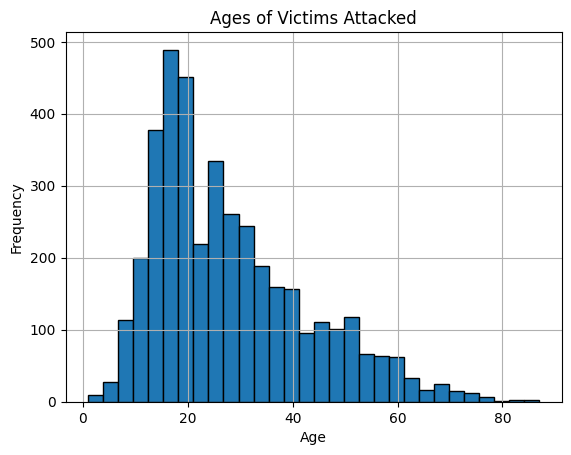

In [7]:
# Q2. 4)
import matplotlib.pyplot as plt
# Clean the 'Age' column
shark_attack_df['Age'] = shark_attack_df['Age'].astype(str)
shark_attack_df['Age'] = shark_attack_df['Age'].str.extract(r'(\d+)')
shark_attack_df['Age'] = pd.to_numeric(shark_attack_df['Age'])
shark_attack_df['Age'].dropna().hist(bins=30, edgecolor='black')
plt.title("Ages of Victims Attacked")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Q2. 5) # Male Victims
shark_attack_df['Sex'] = shark_attack_df['Sex'].str.upper()
male = shark_attack_df['Sex'].value_counts(normalize=True)['M']
print(f"Proportion of male: {male}")

Proportion of male: 0.8752533915484173


In [13]:
# Q2. 6)
#Clean the 'Type' column
shark_attack_df['Type'] = shark_attack_df['Type'].replace(['Provoked'], 'Provoked').replace(['Uprovoked'], 'Unprovoked')
shark_attack_df['Type'] = shark_attack_df['Type'].fillna('Unknown')

# Proportion of unprovoked attacks
unprovoked = shark_attack_df['Type'].value_counts(normalize=True)['Unprovoked']
print(f"Unprovoked attacks: {unprovoked}")

Unprovoked attacks: 0.7369851258581236


In [20]:
# Q2 7)
shark_attack_df['Fatal Y/N'] = shark_attack_df['Fatal Y/N'].astype(str).str.strip()
shark_attack_df['Fatal Y/N'] = shark_attack_df['Fatal Y/N'].replace({
    'N': 'N', 'Y': 'Y',
    'UNKNOWN': 'Unknown',
    'Nq': 'Unknown',
    'F': 'Unknown', 'M':'Unknown',
    'Y x 2': 'Y',
    '2017': 'Unknown',
    'y': 'Y', 'n': 'N'
})
fatal_attacks = shark_attack_df['Fatal Y/N'].value_counts(normalize=True)
print(f"Proportion of fatal attacks: {fatal_attacks}")

Proportion of fatal attacks: Fatal Y/N
N          0.698084
Y          0.210240
Unknown    0.091676
Name: proportion, dtype: float64


In [22]:
# Unprovoked attacks by gender
unprovoked_by_gender = shark_attack_df[shark_attack_df['Type'] == 'Unprovoked']['Sex'].value_counts(normalize=True)
print(f"Unprovoked attacks by gender: {unprovoked_by_gender}")

# Fatal attacks by provocation
fatal_by_type = shark_attack_df[shark_attack_df['Fatal Y/N'] == 'Y'].groupby('Type').size()
print(f"Fatal attacks by provocation: {fatal_by_type}")

# Fatal attacks by gender
fatal_by_gender = shark_attack_df[shark_attack_df['Fatal Y/N'] == 'Y']['Sex'].value_counts(normalize=True)
print(f"Fatal attacks by gender: {fatal_by_gender}")

Unprovoked attacks by gender: Sex
M      0.864794
F      0.134403
M      0.000401
 M     0.000201
LLI    0.000201
Name: proportion, dtype: float64
Fatal attacks by provocation: Type
 Provoked          1
Invalid            8
Provoked          20
Questionable       4
Sea Disaster     170
Unknown            4
Unprovoked      1252
Watercraft        11
dtype: int64
Fatal attacks by gender: Sex
M        0.909758
F        0.088041
M X 2    0.000734
.        0.000734
N        0.000734
Name: proportion, dtype: float64


Q2. 8) Based on the proportions found in the earlier cells, males seem to be more likely to be attacked by sharks. They are also more likely to be attacked unprovoked and experince more fatal attacks. Most fatal shark attacks happen to occur unprovoked. Personally, I find sharks fascinating, but scary as well.

In [25]:
# Q2 9)
shark_attack_df['Species '] = shark_attack_df['Species '].fillna('Unknown')
white_sharks = shark_attack_df['Species '].str.split().apply(lambda x: 'White Shark' in x).mean()
print(f"Proportion of attacks by white sharks: {white_sharks}")

Proportion of attacks by white sharks: 0.0


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

Q4.

1) The US Census gathered race by making survey respondents report their own races. The categories listed on the survey was White, Black, American Indian, Asian, Native Hawaiian, and Other.

2) Census data is used for a number of reasons including resource allocation and building proper legislation that protects individuals of all ethnic backgrounds. Without proper data collection, communities could lack the proper accessibility to resources and eliminate the ability to understand the experinces of certain communities of different ethnic groups.

3) The census has allowed for broader ways and definitions of racial identities as it allows for people to self identify and pick multiple races based on their background. However, the census also collapses a lost of racial groups into the same category when these two groups are vastly different and diverse in their experinces and needs.


4) The census gathers gender based on the sole two categories of "Male" or "Female". It does not consider other sorts of gender identities. There is a similar self identification option as race, but there are no gender identity options beyond the binary categories. This results in misleading and inaccurate data as respondents who may identify to other gender identities report their birth sex rather than their gender. This isn't inclusive or understanding of unique gender experinces and therefore the data collected does not allow for the allocation of certain resources towards those who may need it more than others.

5) Cleaning data, at times, means shrinking data categories into one overlying category. This tends to disregard and simplify the vast and diverse racial identity that each category encompasses. Missing values, especially from those of misrepresented or underrepresented groups, means these groups might be able to access the resources and visibility that they could benefit from. Data cleaning is important because it allows for keeping the security of certain answers, but collapsing categories for the sake of data cleaning also limits the level of accurate data one can capture.

6) With an algorithm concerning indivdiual identity there is always a concern about bias and discrimination. Beyond all of these algorithms there is always a person who cares some level of prejudice and increases the risk of carrying these prejudices into the algorithms and system they write. Additionally, these algorithms might be trained using biased data on that could lead to racial profiling and discrimination.